# Exploratory Data Analysis for Basal Cell Carcinoma Dataset

## Imports
---

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer
import re
from matplotlib import rcParams
from collections import Counter
import math
import scipy.stats as ss
from sklearn.metrics import matthews_corrcoef as mat_corr

## Load Dataset
---

In [131]:
filepath = r'C:\Users\dimka\Documents\Dermoscopy_Dataset\datasets\BCC FINAL Learning Set.csv'
imagepath = r'C:\Users\dimka\Documents\Dermoscopy_Dataset\datasets\All BCC'

initial_data = pd.read_csv(filepath)
initial_data.head()

,A/A,"Histological diagnosis1:superficial, 2:low risk, 3:high risk",AGE,"SEX 0:male, 1:female",Location 1=head/neck 2=trunk 3=upper extremities 4=lower extremities,Folicular citeria 1-YES 0-No,Milia + Comedo 1-YES 0-No,MAY globues 1-YES 0-NO,Shinywhite_struct. 1-Yes. 0-No,"Arborizingtelangiectasia 1:Yes, 0:No","Shortfinesuperficialtelangiectasia 1:Yes, 0:No","Multiplesmallerosions 1:Yes, 0:No","Ulceration 1:Yes, 0:No",Blue globlules/nests,Brown color structures,"Histological diagnosis1:superficial, 2:low risk, 3:high risk.1",Histological type
0,1,2,79.0,M,1.0,0,1,0,1,0,1,1,1,0.0,0,2.0,NaN
1,2,2,41.0,M,2.0,0,1,0,0,0,1,0,0,1.0,1,2.0,NaN
2,3,2,74.0,M,2.0,0,0,0,1,1,0,0,0,1.0,0,2.0,NaN
3,4,1,77.0,M,2.0,0,0,0,0,0,1,0,0,1.0,0,1.0,NaN
4,5,2,37.0,M,1.0,1,0,0,0,0,1,0,1,1.0,1,2.0,NaN


## Dataframe Reordering
---

### Check Columns

In [132]:
initial_data.columns

Index(['    A/A',
       'Histological diagnosis1:superficial, 2:low risk, 3:high risk', 'AGE',
       'SEX                0:male, 1:female',
       'Location 1=head/neck 2=trunk 3=upper extremities 4=lower extremities',
       'Folicular citeria 1-YES 0-No', 'Milia + Comedo 1-YES 0-No',
       'MAY globues 1-YES 0-NO', 'Shinywhite_struct. 1-Yes. 0-No',
       'Arborizingtelangiectasia 1:Yes, 0:No',
       'Shortfinesuperficialtelangiectasia 1:Yes, 0:No',
       'Multiplesmallerosions 1:Yes, 0:No', 'Ulceration   1:Yes, 0:No',
       'Blue globlules/nests', 'Brown color structures ',
       'Histological diagnosis1:superficial, 2:low risk, 3:high risk.1',
       'Histological type'],
      dtype='object')

## Check Datatypes and null values

In [133]:
initial_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 17 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0       A/A                                                               842 non-null    int64  
 1   Histological diagnosis1:superficial, 2:low risk, 3:high risk          842 non-null    int64  
 2   AGE                                                                   837 non-null    float64
 3   SEX                0:male, 1:female                                   838 non-null    object 
 4   Location 1=head/neck 2=trunk 3=upper extremities 4=lower extremities  837 non-null    float64
 5   Folicular citeria 1-YES 0-No                                          842 non-null    int64  
 6   Milia + Comedo 1-YES 0-No                                             842 non-null    int64  
 7  

Features 2, 3, 4, 13, 15 and 16 have null values.

In [134]:
initial_data.describe()

,A/A,"Histological diagnosis1:superficial, 2:low risk, 3:high risk",AGE,Location 1=head/neck 2=trunk 3=upper extremities 4=lower extremities,Folicular citeria 1-YES 0-No,Milia + Comedo 1-YES 0-No,MAY globues 1-YES 0-NO,Shinywhite_struct. 1-Yes. 0-No,"Arborizingtelangiectasia 1:Yes, 0:No","Shortfinesuperficialtelangiectasia 1:Yes, 0:No","Multiplesmallerosions 1:Yes, 0:No","Ulceration 1:Yes, 0:No",Blue globlules/nests,Brown color structures,"Histological diagnosis1:superficial, 2:low risk, 3:high risk.1"
count,842.000000,842.000000,837.000000,837.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,841.000000,842.000000,841.000000
mean,421.500000,1.907363,71.309438,1.451613,0.141330,0.108076,0.033254,0.441805,0.517815,0.387173,0.186461,0.407363,0.318668,0.351544,1.907253
std,243.208758,0.592034,48.480782,0.678877,0.348569,0.310661,0.179406,0.496897,0.617071,0.487393,0.392749,0.491636,0.466237,0.477736,0.592378
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,211.250000,2.000000,61.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,421.500000,2.000000,71.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,631.750000,2.000000,80.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000
max,842.000000,3.000000,1019.000000,4.000000,1.000000,1.000000,1.000000,1.000000,11.000000,1.000000,2.000000,1.000000,1.000000,1.000000,3.000000


**AGE:** needs checking, max value beyond expect bounds (1019)

<img src="../Graphics/EDA/AGE out of bounds.png"/>


<img src="../Graphics/EDA/AGE out of bounds zero.png"/>


2x1019 values definately out of bounds, 2x119 seem improbable, also 0 value on sample 744 wrong as well, as it can be seen on the dermoscopy image.

<img height="240" src="../Graphics/EDA/sample 744.png" width="240"/>

**Arborizingtelangiectasia:** needs checking, max value beyond expected bounds (11)


<img src="../Graphics/EDA/Arbor out of bounds.png"/>

One value out of bounds (11), probably 1 was intended

## Correct the meaningless values

In [135]:
df = initial_data.copy(deep=True) # create a copy of the original data

In [136]:
df.columns

Index(['    A/A',
       'Histological diagnosis1:superficial, 2:low risk, 3:high risk', 'AGE',
       'SEX                0:male, 1:female',
       'Location 1=head/neck 2=trunk 3=upper extremities 4=lower extremities',
       'Folicular citeria 1-YES 0-No', 'Milia + Comedo 1-YES 0-No',
       'MAY globues 1-YES 0-NO', 'Shinywhite_struct. 1-Yes. 0-No',
       'Arborizingtelangiectasia 1:Yes, 0:No',
       'Shortfinesuperficialtelangiectasia 1:Yes, 0:No',
       'Multiplesmallerosions 1:Yes, 0:No', 'Ulceration   1:Yes, 0:No',
       'Blue globlules/nests', 'Brown color structures ',
       'Histological diagnosis1:superficial, 2:low risk, 3:high risk.1',
       'Histological type'],
      dtype='object')

In [137]:
df.drop(columns=['Histological diagnosis1:superficial, 2:low risk, 3:high risk.1', '    A/A'], inplace=True)
df.columns

Index(['Histological diagnosis1:superficial, 2:low risk, 3:high risk', 'AGE',
       'SEX                0:male, 1:female',
       'Location 1=head/neck 2=trunk 3=upper extremities 4=lower extremities',
       'Folicular citeria 1-YES 0-No', 'Milia + Comedo 1-YES 0-No',
       'MAY globues 1-YES 0-NO', 'Shinywhite_struct. 1-Yes. 0-No',
       'Arborizingtelangiectasia 1:Yes, 0:No',
       'Shortfinesuperficialtelangiectasia 1:Yes, 0:No',
       'Multiplesmallerosions 1:Yes, 0:No', 'Ulceration   1:Yes, 0:No',
       'Blue globlules/nests', 'Brown color structures ', 'Histological type'],
      dtype='object')

### Simplify the column names

In [138]:
simplified_names = ['Diagnosis', 'Age', 'Sex', 'Location'] + [f'Feature {x}' for x in range(len(df.columns) - 5)] +  ['Histological Type']
name_dict = dict(zip(simplified_names, df.columns))   #store the corresponding initial values along with the new ones in a dictionary

In [139]:
df.columns = simplified_names

### Check the distribution of Ages

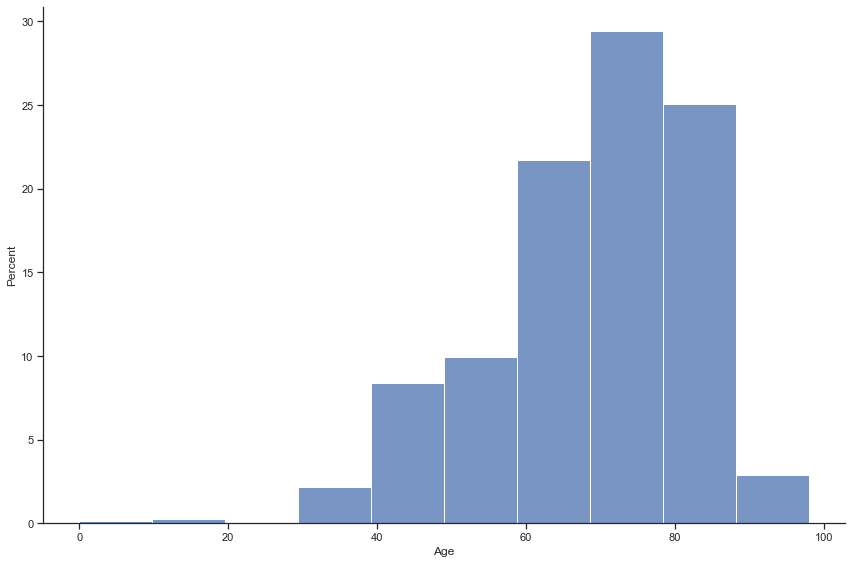

In [140]:
#plot the Age distribution only for ages below 100
sns.displot(df[df['Age'] < 100], x='Age',height=8, aspect=1.5, stat='percent', bins=10)
plt.xlabel('Age');
plt.ylabel('Percent');

In [141]:
mid_age = df[df['Age'] < 100]['Age'].median()   #Distribution is skewed so prefer to impute using the median
df.loc[(df['Age'] > 100) | (df['Age'] == 0) , 'Age'] = mid_age  #Impute with the median any values over 100 or equal to 0
df['Age'].fillna(value=mid_age, inplace=True)   #fill NaN values with the median

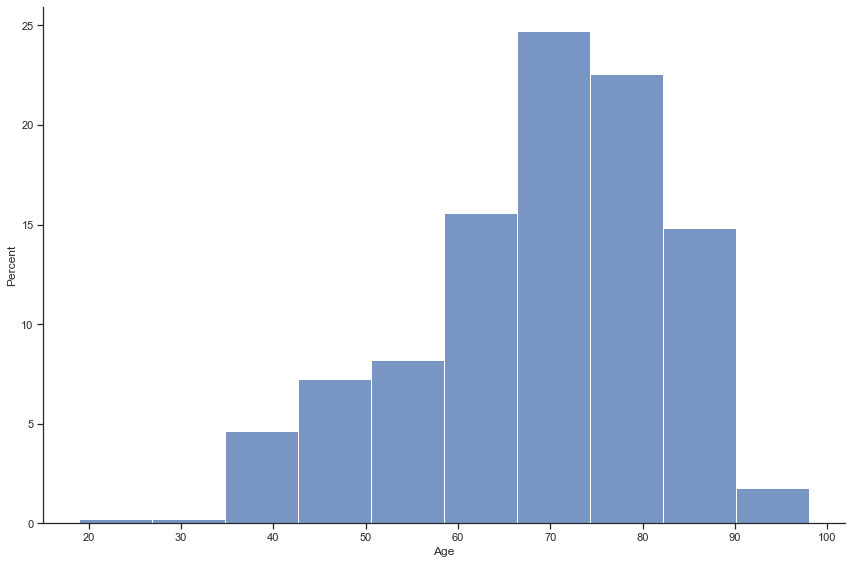

In [188]:
sns.displot(df, x='Age', stat='percent', height=8, aspect=1.5, bins=10) #plot the Age distribution again with all values
# plt.xticks(range(2), ['Male', 'Female'])
plt.xlabel('Age');
plt.ylabel('Percent');

### Check the Sex Feature Values and Distribution

In [143]:
df['Sex'].unique()    #check the unique values appearing in the Sex column

array(['M', 'F', nan, 'F ', '1', '0'], dtype=object)

In [144]:
def correct_sex_value(x):
    if isinstance(x, str):
        y=x.lower().strip()
        if y=='m' or y=='0':
            return 0
        elif y=='f' or y=='1':
            return 1
    else:
        return x

df['Sex'] = df['Sex'].apply(correct_sex_value)  #replace M, F with 0 and 1

In [145]:
list(df['Sex'].unique())

[0.0, 1.0, nan]

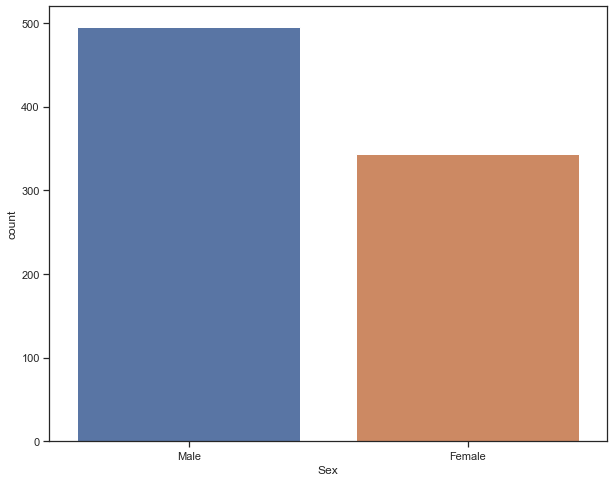

In [146]:
rcParams['figure.figsize'] = 10,8
sns.countplot(x=df['Sex']) #plot the Sex distribution
plt.xticks([0, 1], ['Male', 'Female']);

In [147]:
df.Sex.mode()

0    0.0
Name: Sex, dtype: float64

In [148]:
df['Sex'].fillna(0, inplace=True)   #fill the missing values with the mode of Sex
list(df['Sex'].unique())

[0.0, 1.0]

### Plot the distribution of diagnosis based on sex and age of the patients

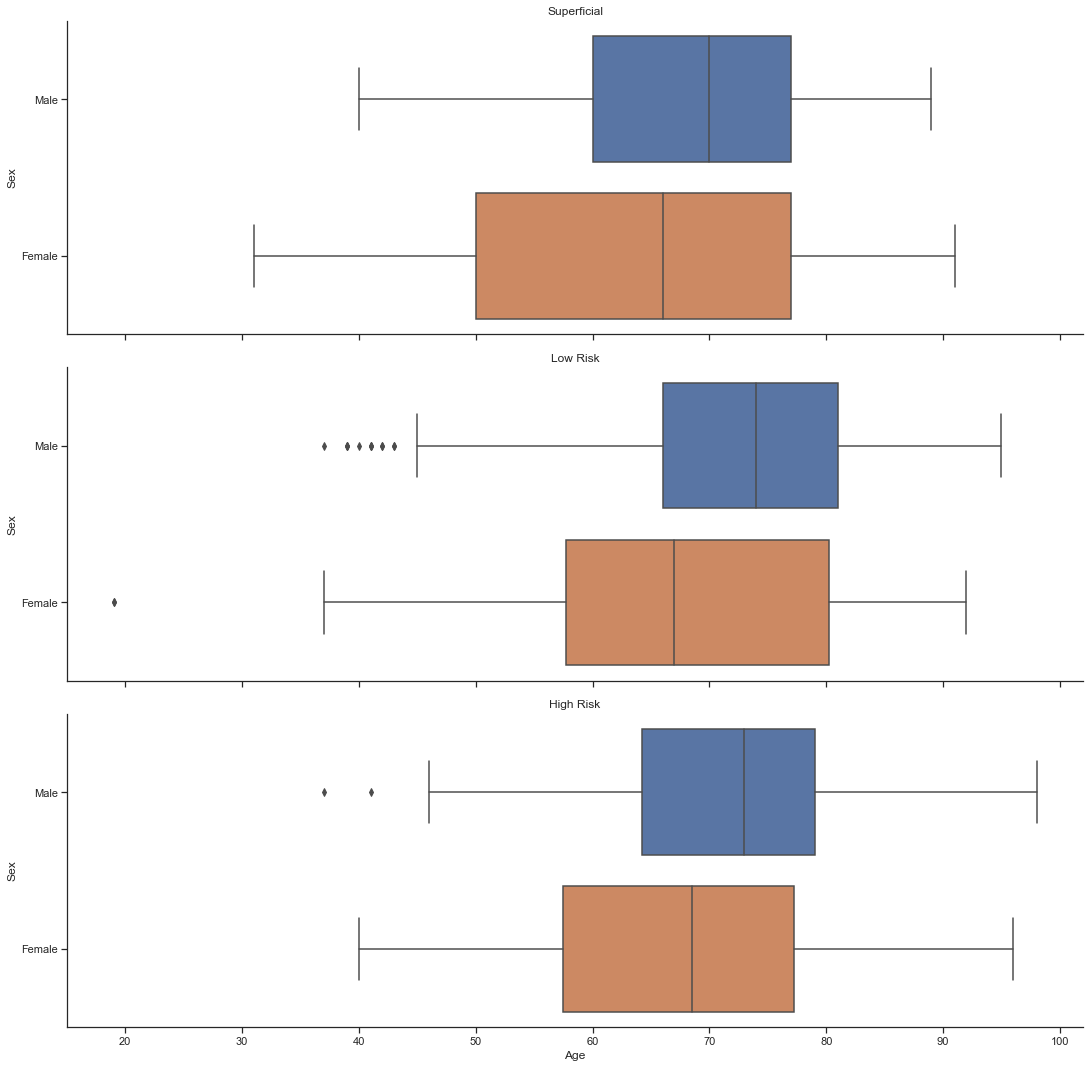

In [149]:
sns.set_theme(style="ticks")
g = sns.catplot(x='Age', y='Sex', row='Diagnosis', kind='box', orient='h', height=5, aspect=3, data=df)
plt.yticks([0, 1], ['Male', 'Female'])
hist_diagnosis_columns = ['Superficial', 'Low Risk', 'High Risk']
diagnosis = 0
for ax in g.axes.flatten():
    ax.set_title(hist_diagnosis_columns[diagnosis])
    diagnosis +=1

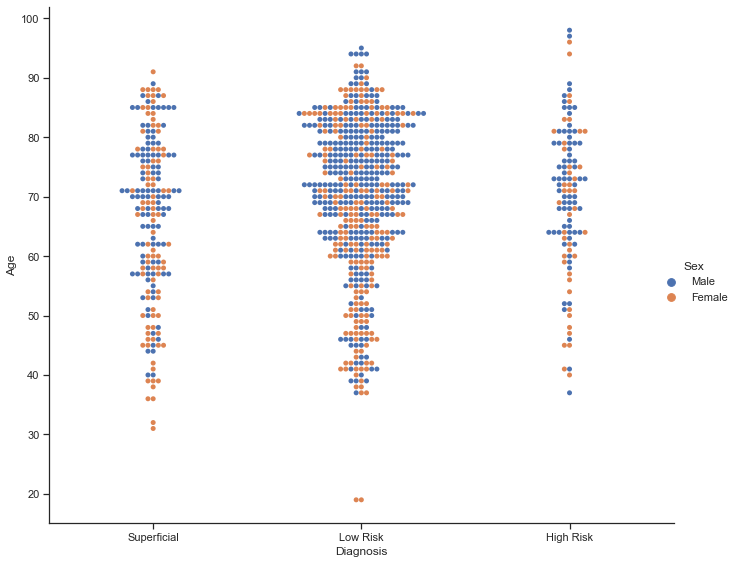

In [150]:
g = sns.catplot(x='Diagnosis', y='Age', hue='Sex', kind='swarm', height=8, aspect=1.2, data=df)
plt.xticks([0, 1, 2], hist_diagnosis_columns)
for t, l in zip(g._legend.texts, ['Male', 'Female']):
    t.set_text(l)

### One-Hot Encode the Histological Diagnosis Feature

In [151]:
hist_diagnosis = pd.get_dummies(df.iloc[:, 0])
hist_diagnosis.columns = hist_diagnosis_columns

### Correct the different types in Histological Type feature and one-hot encode it

In [152]:
df['Histological Type'].unique()

array([nan, 'morphea', 'micronodular', 'infiltrativ', 'morhea',
       'morphea/infiltrative', 'infiltrative', 'basosquamous',
       'infiltraive', 'infitrative'], dtype=object)

In [153]:
def correct_hist_types(x):
    if isinstance(x, str):
        x = x.lower()
        morphea = re.search(pattern='mor', string=x)
        micronodular = re.search(pattern='micronod', string=x)
        basosquamous = re.search(pattern='basosq', string=x)
        infiltrating = re.search(pattern='infi', string=x)

        if morphea:
            return 'Morphea'
        elif micronodular:
            return 'Micronodular'
        elif basosquamous:
            return 'Basosquamous'
        elif infiltrating:
            return 'Infiltrating'
    else:
        return np.nan

In [154]:
df['Histological Type'] = df['Histological Type'].apply(correct_hist_types) #correct the values in the feature

In [155]:
hist_type = pd.get_dummies(df.iloc[:, -1])  #one-hot encode the histological types

In [156]:
sum(hist_diagnosis['High Risk'] - hist_type.sum(axis=1))    #sanity check to see if all high risk diagnosis have a type assigned to them

3

In [157]:
#check to see if the above number responds to High Risk diagnosis not having a subtype assigned
#if so the two numbers should be equal
high_risk_without_subtype_condition = hist_diagnosis['High Risk'] == 1 & ((hist_type['Morphea'] == 0) & (hist_type['Micronodular'] == 0) & (hist_type['Basosquamous'] == 0) & (hist_type['Infiltrating'] == 0))
sum(high_risk_without_subtype_condition)

3

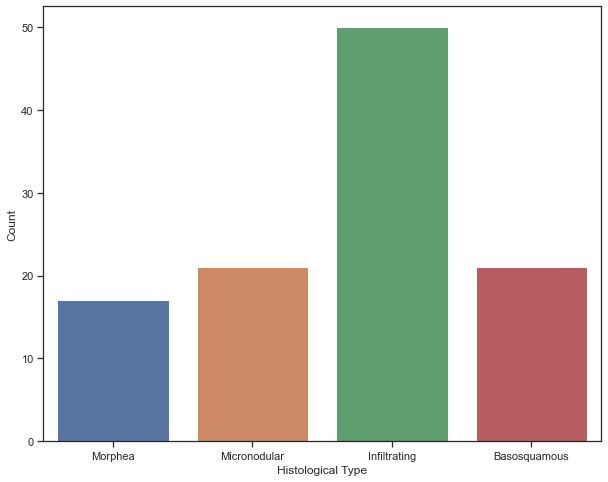

In [158]:
rcParams['figure.figsize'] = 10,8
sns.countplot(x=df['Histological Type']) #plot the Histological Type distribution
plt.xlabel('Histological Type')
plt.ylabel('Count');

In [159]:
for no_type in hist_diagnosis.index[high_risk_without_subtype_condition].tolist():
    hist_type.loc[no_type, 'Infiltrating'] = 1
sum(hist_diagnosis['High Risk'] - hist_type.sum(axis=1))

0

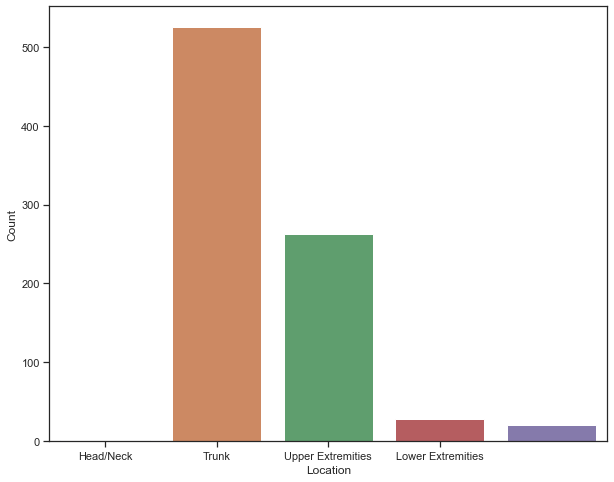

In [160]:
location_columns = ['Head/Neck', 'Trunk', 'Upper Extremities', 'Lower Extremities']
rcParams['figure.figsize'] = 10,8
sns.countplot(x=df['Location']) #plot the Histological Type distribution
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(range(4), location_columns);

In [161]:
location_mode = int(df.Location.mode())
df['Location'].fillna(location_mode, inplace=True)    #Replace NaN values with the mode in the Location column
df.loc[df['Location']==0, 'Location'] = location_mode   #Replace 0 values with the mode in the Location column

In [162]:

location = pd.get_dummies(df.iloc[:, 3])
location.columns = location_columns

In [163]:
age_columns = ['Age 0-30', 'Age 30-40', 'Age 40-50', 'Age 50-60', 'Age 60-70', 'Age 70-80', 'Age 80-90', 'Age 90+']

In [164]:
age_ranges = pd.get_dummies(pd.cut(df.Age, [0, 30, 40, 50, 60, 70, 80, 90, 100], labels=age_columns)) #one-hot ages into age ranges

In [165]:
df['Feature 8'].fillna(0, inplace=True)

In [178]:
df['Sex'] = df['Sex'].astype(int)

### Concatenate new features to a new dataframe

In [179]:
df_prepared = df.copy().drop(['Diagnosis', 'Age', 'Location', 'Histological Type'], axis=1) #keep only the features we need from the original dataframe

In [180]:
df_prepared = pd.concat([df_prepared, location, age_ranges, hist_type, hist_diagnosis], axis=1) #concatenate the one-hot dataframes
df_prepared.drop(['High Risk'], axis=1, inplace=True)   #drop high risk feature as we have the analysis on the subtypes

### Check the correlation of the dataset features
We will use the entropy coefficient or Theil's U to measure the association between the features

The entropy of a distribution is given as:


$H \left( X \right) = -  \sum_{x} P_{X} \left( x \right) \log P_{X} \left(x \right)$

the conditional entropy is:


$H \left( X \middle| Y \right) = -  \sum_{x, y} P_{X, Y} \left( x, y \right) \log P_{X \middle| Y} \left(x \middle| y \right)$

and the uncertainty coefficient as:

$U \left(X \middle| Y \right) = \frac{H \left( X \right) - H \left( X \middle| Y \right)}{H \left( X \right)} = \frac{I \left( X; Y \right)}{H \left( X \right)}$

In [181]:
def replace_nan_with_value(x, y, value):
    x = np.array([v if v == v and v is not None else value for v in x])  # NaN != NaN
    y = np.array([v if v == v and v is not None else value for v in y])
    return x, y

def conditional_entropy(x, y):
    # calculates the conditional entropy of x given y

    x, y = replace_nan_with_value(x, y, 0.0)

    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy

def theil_u(x,y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

def corr_matrix(data, figsize=(15,15)):
    columns = data.columns

    corr =  pd.DataFrame(index=columns, columns=columns)

    for i in range(0, len(columns)):
        for j in range(i, len(columns)):
            if i==j:
                corr.loc[columns[i], columns[j]] = 1.0
            else:
                ij = theil_u(data[columns[i]], data[columns[j]])
                ji = theil_u(data[columns[j]], data[columns[i]])
                corr.loc[columns[i], columns[j]] = ij if not np.isnan(ij) and abs(ij) < np.inf else 0.0
                corr.loc[columns[j], columns[i]] = ji if not np.isnan(ji) and abs(ji) < np.inf else 0.0

    corr.fillna(value=np.nan, inplace=True)


    plt.figure(figsize=figsize)

    # cm = pd.DataFrame(data=np.zeros_like(corr), columns=corr.columns, index=corr.index)
    sns.heatmap(corr, center=0, annot=True, fmt='.2f', cmap=sns.diverging_palette(220, 20, n=5, as_cmap=True), square=True)
    plt.title('Blabla')
    plt.show()

In [169]:
# corr_matrix(df_prepared)

In [170]:

# rcParams['figure.figsize'] = 10,10
# plt.figure(figsize=(20,20))
# sns.heatmap(df_prepared.corr(), center=0, annot=True, fmt='.2f', cmap=sns.diverging_palette(220, 20, n=5, as_cmap=True), square=True)
# plt.title('Blabla')
# plt.show()

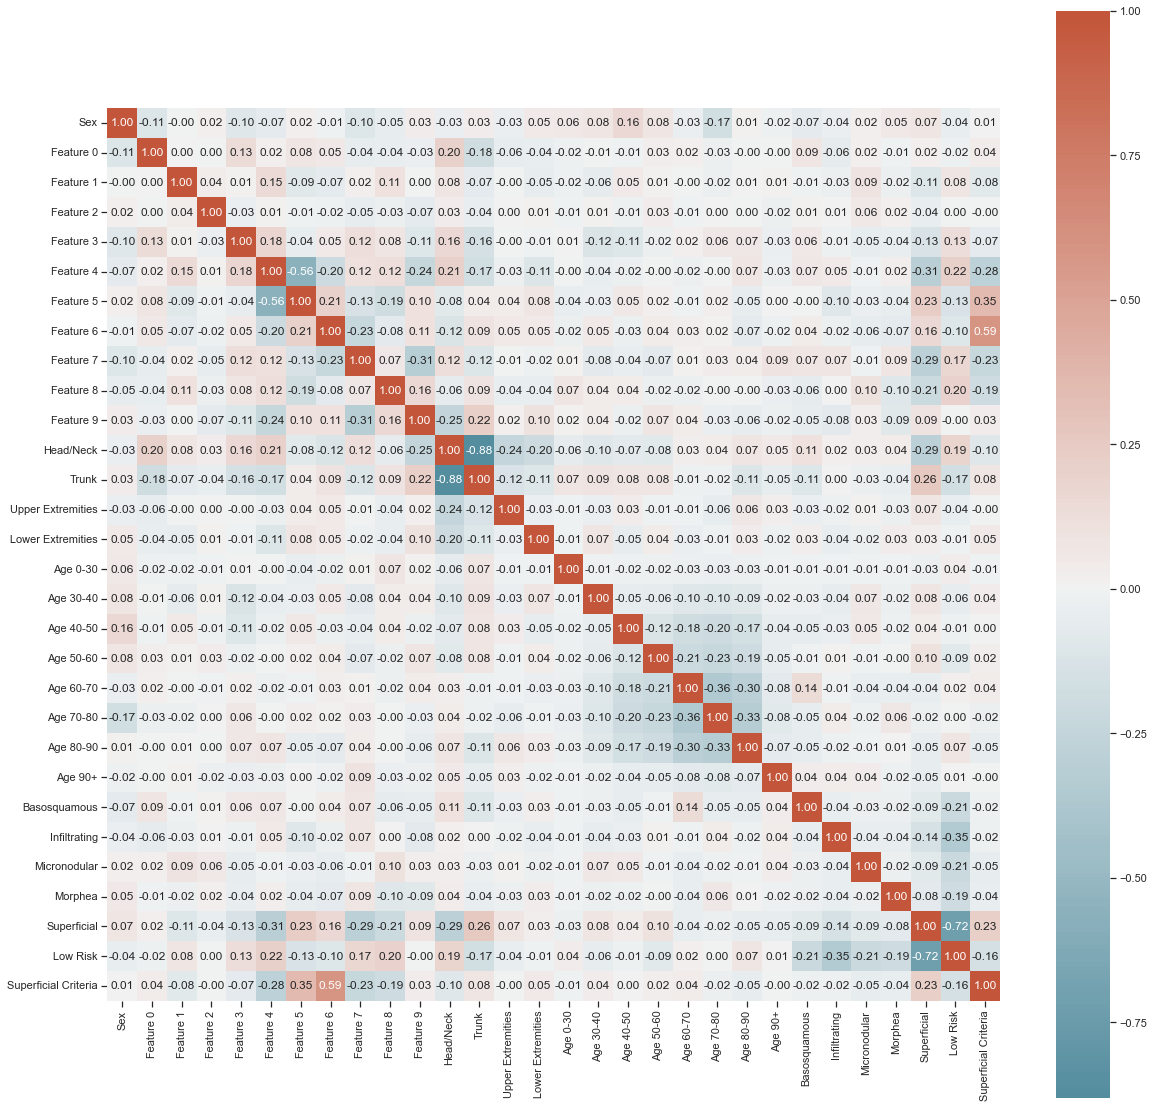

In [190]:
def mat_corr_matrix(data, figsize=(20, 20)):

    columns = data.columns

    mcorr = pd.DataFrame(index=columns, columns=columns)

    for i in range(0, len(columns)):
        for j in range(i, len(columns)):
            if i==j:
                mcorr.loc[columns[i], columns[j]] = 1.0
            else:
                ij = mat_corr(data[columns[i]], data[columns[j]])
                ji = mat_corr(data[columns[j]], data[columns[i]])
                mcorr.loc[columns[i], columns[j]] = ij if not np.isnan(ij) and abs(ij) < np.inf else 0.0
                mcorr.loc[columns[j], columns[i]] = ji if not np.isnan(ji) and abs(ji) < np.inf else 0.0

    mcorr.fillna(value=np.nan, inplace=True)

    plt.figure(figsize=figsize)

    # cm = pd.DataFrame(data=np.zeros_like(corr), columns=corr.columns, index=corr.index)
    sns.heatmap(mcorr, center=0, annot=True, fmt='.2f', cmap=sns.diverging_palette(220, 20, n=5, as_cmap=True), square=True)
    # plt.title('Matthews Correlation Coefficient Matrix')
    plt.show()

mat_corr_matrix(df_prepared)